In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
!rm -rf ssd
!mkdir ssd
!mkdir ssd/checkpoints
!mkdir ssd/checkpoints/soups
!mkdir results

In [ ]:
!pip install wget
!pip install clip
!pip install datasets
!pip install GPUtil pytorch_pretrained_bert transformers
!pip uninstall emoji
!pip install emoji==1.7

!pip install barbar

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=7c735af309049a876be31eda1d94cb48f212ac3c3333192597fd427ec65ae85a
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-0.2.0-py3-none-any.whl size=6988 sha256=dbfc86fc4966eafc983b5eafaab744c8d7b9e4ffe5c89226ab8bedae31c83196
  Stored in directory: /root/.cache/pip/wheels/7f/5c/e6/2c0fdb453a3569188864b17e9676bea8b3b7e160c037117869
Successfully built clip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... do

In [ ]:
from emoji import UNICODE_EMOJI
import wget
import clip
from transformers import AutoModel
from barbar import Bar
from transformers import AutoTokenizer, AutoModel

In [ ]:


import os

import torch

import os
import json
import operator

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import time
import torch.nn as nn
import torch

import torch.nn.functional as F
from torch.autograd import Variable
import re
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import Dataset, DataLoader
import pandas as pd

In [ ]:
dic = {
      "egypt": 'المصرية',
	  "nile": 'المصرية',
	  "msa": "اللغة العربية الفصحى",
	  "magreb": "المغربية",
	  "gulf": "الخليجية",
	  "levant": "الشامية"
}

# RNN models

In [ ]:
class AttentionWithContext(nn.Module):
    def __init__(self, hidden_dim):
        super(AttentionWithContext, self).__init__()

        self.attn = nn.Linear(hidden_dim, hidden_dim)
        self.contx = nn.Linear(hidden_dim, 1, bias=False)
        #self.apply(init_weights)
    def forward(self, inp):
        u = torch.tanh_(self.attn(inp))
        a = F.softmax(self.contx(u), dim=1)
        s = (a * inp).sum(1)
        return s




In [ ]:



class ATTClassifier(nn.Module):
    def __init__(self, in_feature, class_num=1, dropout_prob=0.2):
        super(ATTClassifier, self).__init__()
        self.model =  AttentionWithContext(in_feature)

        self.Classifier = nn.Sequential(
            nn.Linear(2 * in_feature, 512),
            nn.Dropout(dropout_prob),
            nn.ReLU(),
            nn.Linear(512, class_num)
        )

        self.apply(init_weights)

    def forward(self, x):

        mod = self.model(x[0]) #(X[0] (bs, seqlenght, embedD) att = \sum_i alpha_i x[0][i]
        xx = torch.cat([mod, x[1]], 1)

        out = self.Classifier(xx)
        return out


# utils

In [ ]:
def plot_cf(cf_matrix):
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")
    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    ## Display the visualization of the Confusion Matrix.
    plt.show()

In [ ]:
def calc_accuracy(preds,y):
    predict = torch.argmax(preds, dim=1)
    accuracy = torch.sum(predict == y.squeeze()).float().item()
    return accuracy / float(preds.size()[0])

In [ ]:
def assign_learning_rate(param_group, new_lr):
    param_group["lr"] = new_lr

In [ ]:
def _warmup_lr(base_lr, warmup_length, step):
    return base_lr * (step + 1) / warmup_length

In [ ]:
def cosine_lr(optimizer, base_lrs, warmup_length, steps):
    if not isinstance(base_lrs, list):
        base_lrs = [base_lrs for _ in optimizer.param_groups]
    assert len(base_lrs) == len(optimizer.param_groups)
    def _lr_adjuster(step):
        for param_group, base_lr in zip(optimizer.param_groups, base_lrs):
            if step < warmup_length:
                lr = _warmup_lr(base_lr, warmup_length, step)
            else:
                e = step - warmup_length
                es = steps - warmup_length
                lr = 0.5 * (1 + np.cos(np.pi * e / es)) * base_lr
            assign_learning_rate(param_group, lr)
    return _lr_adjuster

# main

In [ ]:


args = {"data_location": os.path.expanduser('./data'),
        "model_location": os.path.expanduser('./ssd/checkpoints/soups'),
        "download_models": False,
        "eval_individual_models":True,
        "uniform_soup": True,
        "greedy_soup": True,
        "plot": True,
        "batch_size": 36,
        "workers": 8,
        "pretrained_path": "UBC-NLP/MARBERT",
        'loss' : 'FL',
        'max_length': 64

}



In [ ]:
args

{'data_location': './data',
 'model_location': './ssd/checkpoints/soups',
 'download_models': False,
 'eval_individual_models': True,
 'uniform_soup': True,
 'greedy_soup': True,
 'plot': True,
 'batch_size': 36,
 'workers': 8,
 'pretrained_path': 'UBC-NLP/MARBERT',
 'loss': 'FL',
 'max_length': 64}

In [ ]:

args["model_location"]

'./ssd/checkpoints/soups'

In [ ]:
if not os.path.exists(args["model_location"]):
    os.mkdir(args["model_location"])

In [ ]:
ls ./ssd/checkpoints/soups

In [ ]:
# !cp -av "/content/drive/MyDrive/iSarcasm/m_298/best_basemodel_sarcasm_32_FL_2e-05_ml64_2_298_sarcat.pth"  "./ssd/checkpoints/soups"
# !cp -av "/content/drive/MyDrive/iSarcasm/m_298/best_cls_sarcasm_32_FL_2e-05_ml64_2_298_sarcat.pth"  "./ssd/checkpoints/soups"

In [ ]:

# !cp -av "/content/drive/MyDrive/iSarcasm/m_298/best_basemodel_sarcasm_64_FL_1e-05_ml64_4_298_sarcat.pth"  "./ssd/checkpoints/soups"
# !cp -av "/content/drive/MyDrive/iSarcasm/m_298/best_cls_sarcasm_64_FL_1e-05_ml64_4_298_sarcat.pth"  "./ssd/checkpoints/soups"

In [ ]:
# !cp -av "/content/drive/MyDrive/iSarcasm/m_298/best_basemodel_sarcasm_36_FL_2e-05_ml64_2_298_sarcat.pth"  "./ssd/checkpoints/soups"
# !cp -av "/content/drive/MyDrive/iSarcasm/m_298/best_cls_sarcasm_36_FL_2e-05_ml64_2_298_sarcat.pth"  "./ssd/checkpoints/soups"

# !cp -av "/content/drive/MyDrive/iSarcasm/m_298/best_basemodel_sarcasm_32_FL_1e-05_ml64_4_298_sarcat.pth"  "./ssd/checkpoints/soups"
# !cp -av "/content/drive/MyDrive/iSarcasm/m_298/best_cls_sarcasm_32_FL_1e-05_ml64_4_298_sarcat.pth"  "./ssd/checkpoints/soups"


In [ ]:
# !cp -av "/content/drive/MyDrive/iSarcasm/m_298/best_basemodel_sarcasm_16_FL_2e-05_ml64_4_298_sarcat.pth"  "./ssd/checkpoints/soups"
# !cp -av "/content/drive/MyDrive/iSarcasm/m_298/best_cls_sarcasm_16_FL_2e-05_ml64_4_298_sarcat.pth"  "./ssd/checkpoints/soups"

In [ ]:
!cp -av "/content/drive/MyDrive/iSarcasm/attn/m_298/."  "./ssd/checkpoints/soups"

'/content/drive/MyDrive/iSarcasm/attn/m_298/./best_basemodel_sarcasm_16_FL_1e-05_ml64_2_298_sarcat.pth' -> './ssd/checkpoints/soups/./best_basemodel_sarcasm_16_FL_1e-05_ml64_2_298_sarcat.pth'
'/content/drive/MyDrive/iSarcasm/attn/m_298/./best_cls_sarcasm_16_FL_1e-05_ml64_2_298_sarcat.pth' -> './ssd/checkpoints/soups/./best_cls_sarcasm_16_FL_1e-05_ml64_2_298_sarcat.pth'
'/content/drive/MyDrive/iSarcasm/attn/m_298/./best_basemodel_sarcasm_16_FL_1e-05_ml64_4_298_sarcat.pth' -> './ssd/checkpoints/soups/./best_basemodel_sarcasm_16_FL_1e-05_ml64_4_298_sarcat.pth'
'/content/drive/MyDrive/iSarcasm/attn/m_298/./best_cls_sarcasm_16_FL_1e-05_ml64_4_298_sarcat.pth' -> './ssd/checkpoints/soups/./best_cls_sarcasm_16_FL_1e-05_ml64_4_298_sarcat.pth'
'/content/drive/MyDrive/iSarcasm/attn/m_298/./best_basemodel_sarcasm_32_FL_1e-05_ml64_2_298_sarcat.pth' -> './ssd/checkpoints/soups/./best_basemodel_sarcasm_32_FL_1e-05_ml64_2_298_sarcat.pth'
'/content/drive/MyDrive/iSarcasm/attn/m_298/./best_cls_sarcasm_3

In [ ]:

model_paths_base = []


In [ ]:
model_paths_cls = []


In [ ]:
base_dict  = {}
cls_dict={}
directory = './ssd/checkpoints/soups'
for filename in os.listdir(directory):

    if filename.startswith('best_basemodel_'):
        arr = filename.split("_")
        model_name = arr[3]+"_"+arr[4]+"_"+arr[5]+"_"+arr[7]+"_"+arr[8]
        base_dict[model_name]= filename
        model_paths_base.append(filename)
    if filename.startswith('best_cls_'):
        arr = filename.split("_")
        model_name = arr[3]+"_"+arr[4]+"_"+arr[5]+"_"+arr[7]+"_"+arr[8]
        cls_dict[model_name]=filename
        model_paths_cls.append(filename)

In [ ]:
model_paths_base

['best_basemodel_sarcasm_32_FL_1e-05_ml64_2_298_sarcat.pth',
 'best_basemodel_sarcasm_64_FL_1e-05_ml64_4_298_sarcat.pth',
 'best_basemodel_sarcasm_16_FL_1e-05_ml64_4_298_sarcat.pth',
 'best_basemodel_sarcasm_64_FL_2e-05_ml64_4_298_sarcat.pth',
 'best_basemodel_sarcasm_32_FL_2e-05_ml64_4_298_sarcat.pth',
 'best_basemodel_sarcasm_32_FL_2e-05_ml64_2_298_sarcat.pth',
 'best_basemodel_sarcasm_64_FL_1e-05_ml64_2_298_sarcat.pth',
 'best_basemodel_sarcasm_36_FL_2e-05_ml64_4_298_sarcat.pth',
 'best_basemodel_sarcasm_16_FL_2e-05_ml64_4_298_sarcat.pth',
 'best_basemodel_sarcasm_36_FL_1e-05_ml64_4_298_sarcat.pth',
 'best_basemodel_sarcasm_16_FL_1e-05_ml64_2_298_sarcat.pth',
 'best_basemodel_sarcasm_64_FL_2e-05_ml64_2_298_sarcat.pth',
 'best_basemodel_sarcasm_16_FL_2e-05_ml64_2_298_sarcat.pth',
 'best_basemodel_sarcasm_32_FL_1e-05_ml64_4_298_sarcat.pth',
 'best_basemodel_sarcasm_36_FL_1e-05_ml64_2_298_sarcat.pth',
 'best_basemodel_sarcasm_36_FL_2e-05_ml64_2_298_sarcat.pth']

In [ ]:
model_paths_cls

['best_cls_sarcasm_32_FL_1e-05_ml64_4_298_sarcat.pth',
 'best_cls_sarcasm_36_FL_1e-05_ml64_2_298_sarcat.pth',
 'best_cls_sarcasm_32_FL_2e-05_ml64_2_298_sarcat.pth',
 'best_cls_sarcasm_32_FL_1e-05_ml64_2_298_sarcat.pth',
 'best_cls_sarcasm_36_FL_2e-05_ml64_2_298_sarcat.pth',
 'best_cls_sarcasm_16_FL_1e-05_ml64_4_298_sarcat.pth',
 'best_cls_sarcasm_32_FL_2e-05_ml64_4_298_sarcat.pth',
 'best_cls_sarcasm_36_FL_2e-05_ml64_4_298_sarcat.pth',
 'best_cls_sarcasm_64_FL_1e-05_ml64_4_298_sarcat.pth',
 'best_cls_sarcasm_16_FL_2e-05_ml64_4_298_sarcat.pth',
 'best_cls_sarcasm_16_FL_1e-05_ml64_2_298_sarcat.pth',
 'best_cls_sarcasm_36_FL_1e-05_ml64_4_298_sarcat.pth',
 'best_cls_sarcasm_64_FL_2e-05_ml64_4_298_sarcat.pth',
 'best_cls_sarcasm_16_FL_2e-05_ml64_2_298_sarcat.pth',
 'best_cls_sarcasm_64_FL_1e-05_ml64_2_298_sarcat.pth',
 'best_cls_sarcasm_64_FL_2e-05_ml64_2_298_sarcat.pth']

In [ ]:
base_dict

{'32_FL_1e-05_2_298': 'best_basemodel_sarcasm_32_FL_1e-05_ml64_2_298_sarcat.pth',
 '64_FL_1e-05_4_298': 'best_basemodel_sarcasm_64_FL_1e-05_ml64_4_298_sarcat.pth',
 '16_FL_1e-05_4_298': 'best_basemodel_sarcasm_16_FL_1e-05_ml64_4_298_sarcat.pth',
 '64_FL_2e-05_4_298': 'best_basemodel_sarcasm_64_FL_2e-05_ml64_4_298_sarcat.pth',
 '32_FL_2e-05_4_298': 'best_basemodel_sarcasm_32_FL_2e-05_ml64_4_298_sarcat.pth',
 '32_FL_2e-05_2_298': 'best_basemodel_sarcasm_32_FL_2e-05_ml64_2_298_sarcat.pth',
 '64_FL_1e-05_2_298': 'best_basemodel_sarcasm_64_FL_1e-05_ml64_2_298_sarcat.pth',
 '36_FL_2e-05_4_298': 'best_basemodel_sarcasm_36_FL_2e-05_ml64_4_298_sarcat.pth',
 '16_FL_2e-05_4_298': 'best_basemodel_sarcasm_16_FL_2e-05_ml64_4_298_sarcat.pth',
 '36_FL_1e-05_4_298': 'best_basemodel_sarcasm_36_FL_1e-05_ml64_4_298_sarcat.pth',
 '16_FL_1e-05_2_298': 'best_basemodel_sarcasm_16_FL_1e-05_ml64_2_298_sarcat.pth',
 '64_FL_2e-05_2_298': 'best_basemodel_sarcasm_64_FL_2e-05_ml64_2_298_sarcat.pth',
 '16_FL_2e-05_2_

In [ ]:
cls_dict

{'32_FL_1e-05_4_298': 'best_cls_sarcasm_32_FL_1e-05_ml64_4_298_sarcat.pth',
 '36_FL_1e-05_2_298': 'best_cls_sarcasm_36_FL_1e-05_ml64_2_298_sarcat.pth',
 '32_FL_2e-05_2_298': 'best_cls_sarcasm_32_FL_2e-05_ml64_2_298_sarcat.pth',
 '32_FL_1e-05_2_298': 'best_cls_sarcasm_32_FL_1e-05_ml64_2_298_sarcat.pth',
 '36_FL_2e-05_2_298': 'best_cls_sarcasm_36_FL_2e-05_ml64_2_298_sarcat.pth',
 '16_FL_1e-05_4_298': 'best_cls_sarcasm_16_FL_1e-05_ml64_4_298_sarcat.pth',
 '32_FL_2e-05_4_298': 'best_cls_sarcasm_32_FL_2e-05_ml64_4_298_sarcat.pth',
 '36_FL_2e-05_4_298': 'best_cls_sarcasm_36_FL_2e-05_ml64_4_298_sarcat.pth',
 '64_FL_1e-05_4_298': 'best_cls_sarcasm_64_FL_1e-05_ml64_4_298_sarcat.pth',
 '16_FL_2e-05_4_298': 'best_cls_sarcasm_16_FL_2e-05_ml64_4_298_sarcat.pth',
 '16_FL_1e-05_2_298': 'best_cls_sarcasm_16_FL_1e-05_ml64_2_298_sarcat.pth',
 '36_FL_1e-05_4_298': 'best_cls_sarcasm_36_FL_1e-05_ml64_4_298_sarcat.pth',
 '64_FL_2e-05_4_298': 'best_cls_sarcasm_64_FL_2e-05_ml64_4_298_sarcat.pth',
 '16_FL_2e-0

In [ ]:
def init_weights(m):
    classname = m.__class__.__name__
    if classname.find('Conv2d') != -1 or classname.find('ConvTranspose2d') != -1:
        nn.init.kaiming_uniform_(m.weight)
        nn.init.zeros_(m.bias)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight, 1.0, 0.02)
        nn.init.zeros_(m.bias)
    elif classname.find('Linear') != -1:
        nn.init.xavier_normal_(m.weight)
        if m.bias is not None:
            nn.init.zeros_(m.bias)

In [ ]:

class TransformerLayer(nn.Module):
    def __init__(self,both=True,
                pretrained_path='aubmindlab/bert-base-arabert'):
        super(TransformerLayer, self).__init__()

        self.both = both
        self.transformer = AutoModel.from_pretrained(pretrained_path, output_hidden_states=True)


    def forward(self, input_ids=None, attention_mask=None):
        outputs = self.transformer(
            input_ids=input_ids,
            attention_mask=attention_mask
        )
        # (output_last_layer, pooled_cls, (output_layers))
        # output[0] (8, seqlen=64, 768) cls [8, 768] ( 12 (8, seqlen=64, 768))

        return outputs

    def output_num(self):
        return self.transformer.config.hidden_size



In [ ]:
def is_emoji(s):
    return s in UNICODE_EMOJI

In [ ]:
def add_space(text):
    return ''.join(' ' + char if is_emoji(char) else char for char in text).strip()

In [ ]:
def preprocess(text, lang='ar'):
    sent = add_space(text)
    sent = re.sub(r'(?:@[\w_]+)', "user", sent)
    sent = re.sub(r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', "url", sent)
    sent = sent.replace('_', ' ')
    sent = sent.replace('#', ' ')
    return sent

def prepare_text(df, col='tweet'):
    if col == 'tweet':
        df['dialect'] = df['dialect'].map(dic)
    for i in range(df.shape[0]):
        df.loc[i, col] = df.loc[i, 'dialect'] + ' [SEP] ' + df.loc[i, col]


    return df

In [ ]:
class TrainDataset(Dataset):
    def __init__(self, df, pretraine_path='xlm-roberta-base', max_length=128):
        self.df = df
        self.max_length = max_length

        self.tokenizer = AutoTokenizer.from_pretrained(pretraine_path)

    def __getitem__(self, index):
        text = self.df.iloc[index]['tweet']
        label = self.df.iloc[index]["sarcastic"]
        #print("label", label)

        encoded_input = self.tokenizer(
                text,
                max_length = self.max_length,
                padding='max_length',
                truncation=True,
                return_tensors="pt",
            )

        input_ids = encoded_input["input_ids"]
        attention_mask = encoded_input["attention_mask"] if "attention_mask" in encoded_input else None

        data_input = {
            "input_ids":input_ids.flatten(),
            "attention_mask": attention_mask.flatten()
        }

        label_input ={
            "sarcasm": torch.tensor(label, dtype=torch.float),
        }

        return data_input, label_input

    def __len__(self):
        return self.df.shape[0]

In [ ]:
def loadValData(batchsize=16, num_worker=2, pretraine_path="xlm-roberta-base", max_length=128):
    path = "/content/drive/MyDrive/iSarcasm/Datasets2/split_80_20/val.csv"
    data = pd.read_csv(path, encoding='utf-8')
    data['tweet'] = data['tweet'].apply(lambda x:preprocess(x))
    print(data.shape)
    print(data.head())

    data = prepare_text(data, col='tweet')

    DF_test = TrainDataset(data, pretraine_path, max_length)

    DF_test_loader = DataLoader(dataset=DF_test, batch_size=batchsize, shuffle=False,
                                num_workers=num_worker)
    return DF_test_loader



In [ ]:
def loadTestData(batchsize=16, num_worker=2, pretraine_path="xlm-roberta-base", max_length=128):
    path = "/content/drive/MyDrive/iSarcasm/Datasets2/tweet/task_A_Ar_test.csv"
    data = pd.read_csv(path, encoding='utf-8')
    data['tweet'] = data['tweet'].apply(lambda x:preprocess(x))
    data = prepare_text(data, col='tweet')

    DF_test = TrainDataset(data, pretraine_path, max_length)

    DF_test_loader = DataLoader(dataset=DF_test, batch_size=batchsize, shuffle=False,
                                num_workers=num_worker)


    return DF_test_loader



In [ ]:
def loadExamplesData(batchsize=16, num_worker=2, pretraine_path="xlm-roberta-base", max_length=128):
    path = "/content/drive/MyDrive/iSarcasm/Datasets2/tweet/examples.csv"
    data = pd.read_csv(path, encoding='utf-8')
    data['tweet'] = data['tweet'].apply(lambda x:preprocess(x))
    data = prepare_text(data, col='tweet')

    DF_test = TrainDataset(data, pretraine_path, max_length)

    DF_test_loader = DataLoader(dataset=DF_test, batch_size=batchsize, shuffle=False,
                                num_workers=num_worker)


    return DF_test_loader



In [ ]:
def predict(base_model, mt_classifier, iterator):
    # initialize every epoch
    acc_sarcasm= 0
    loss_sarc= 0

    # f1_sarcasm =0
    # f1_score_macro = 0

    all_sarcasm_outputs = np.array([])
    all_sarcasm_labels = np.array([])
    all_sarcasm_probs = []

    # set the model in eval phase
    base_model.eval()
    mt_classifier.eval()
    with torch.no_grad():
      for data_input, label_input in Bar(iterator):
            for k, v in data_input.items():
                data_input[k] = v.to(device)

            for k, v in label_input.items():
                label_input[k] = v.long().to(device)

            sarcasm_target = label_input['sarcasm']

            # forward pass

            output = base_model(**data_input)
            sarcasm_logits = mt_classifier(output)
            logits = sarcasm_logits[:,:2]

            sarcasm_probs = torch.softmax(logits, dim=1)
            # compute the loss
            acc_sarcasm += calc_accuracy(sarcasm_probs, sarcasm_target)

            _, predicted_sarcasm = torch.max(sarcasm_probs, 1)
            all_sarcasm_outputs = np.append(all_sarcasm_outputs, predicted_sarcasm.squeeze().cpu().numpy())
            all_sarcasm_labels = np.append(all_sarcasm_labels, sarcasm_target.squeeze().cpu().numpy())
            all_sarcasm_probs.extend(sarcasm_probs)

    all_sarcasm_outputs = all_sarcasm_outputs.reshape(-1)
    all_sarcasm_labels = all_sarcasm_labels.reshape(-1)

    # fscore_macro = f1_score(y_true=all_sarcasm_labels, y_pred=all_sarcasm_outputs, average='macro')
    # fscore_sarcasm = f1_score(all_sarcasm_labels, all_sarcasm_outputs, average='binary', pos_label=1)


    # report_sarcasm = classification_report(y_true=all_sarcasm_labels, y_pred=all_sarcasm_outputs,digits=4)


    # accuracies = { 'accuracy': acc_sarcasm / len(iterator), 'f1_sarcastic': fscore_sarcasm, "f1_score": fscore_macro, 'report_sarcasm': report_sarcasm}
    # return accuracies, all_sarcasm_outputs, all_sarcasm_labels, sarcasm_probs

    return all_sarcasm_outputs, all_sarcasm_labels, all_sarcasm_probs


In [ ]:
# test = pd.read_csv( "drive/MyDrive/iSarcasm/Datasets/isarcastic/Testing/task_A_Ar_test.csv")
test = pd.read_csv( "/content/drive/MyDrive/iSarcasm/Datasets2/tweet/task_A_Ar_test.csv")


In [ ]:
len_test =len(test)

In [ ]:
len_test

1400

In [ ]:
def eval_full(config, loader1, n):
    df_total = pd.DataFrame.from_dict({'score_0':[0]*len_test, 'score_1':[0]*len_test})
    models_outputs = {}
    INDIVIDUAL_MODEL_RESULTS_FILE_H = '/content/drive/MyDrive/iSarcasm/attn/m_298/results_i/results_h'+str(n+1)+'.jsonl'
    individual_model_db_h = pd.read_json(INDIVIDUAL_MODEL_RESULTS_FILE_H, lines=True)
    # print(individual_model_db_h)

    NUM_MODELS = len(individual_model_db_h)
    # print("NUM_MODELS", NUM_MODELS)

    all_models_name = ', '.join(individual_model_db_h['model_name'])

    base_model = TransformerLayer(pretrained_path=args['pretrained_path'], both=True).to(device)


    j=0
    for _, row in individual_model_db_h.iterrows():
        x = row['model_name']
        # print("model name", x)
        # y is the file name of the base
        arr = x.split("_")
        state_dict_base = torch.load(args['model_location']+f"/{base_dict[x]}")
        state_dict_cls = torch.load(args['model_location']+f"/{cls_dict[x]}")

        base_model.load_state_dict(state_dict_base)
        classifier = get_model_from_sd(state_dict_cls, base_model)
        base_model = base_model.to(device)
        classifier = classifier.to(device)
        df = pd.DataFrame()
        all_outputs, all_outputs_label, all_probs = predict(base_model, classifier, loader1)

        all_sarcasm_probs = np.array([])
        a = torch.stack(all_probs)
        all_sarcasm_probs = (a.cpu().numpy())
        df = pd.DataFrame(all_sarcasm_probs, columns = ['score_0','score_1'])
        models_outputs[x]= df
        df_total = df_total.add( models_outputs[x] [['score_0','score_1']] )

    df_total = df_total/len(individual_model_db_h)
    df_total['pred'] = df_total.apply(lambda row: 1 if row.score_0 < row.score_1 else 0, axis=1)

    # accuracies, all_outputs_pred, all_outputs_label = predict(base_model, classifier, loader1)
    return df_total, models_outputs, all_outputs_label, all_models_name

    # return accuracies, all_outputs_pred, all_outputs_label, all_models_name


In [ ]:
def get_model_from_sd(state_dict_cls, base_model):
    # print("state_dict_cls",state_dict_cls.keys())
    feature_dim = state_dict_cls['Classifier.3.weight'].shape[1]
    num_classes = state_dict_cls['Classifier.3.weight'].shape[0]


    classifier = ATTClassifier(base_model.output_num(), class_num=2).to(device)
    classifier.parameters()
    for p in classifier.parameters():
            p.data = p.data.float()
    classifier.load_state_dict(state_dict_cls)
    classifier = classifier.cuda()
    devices = [x for x in range(torch.cuda.device_count())]
    return torch.nn.DataParallel(classifier,  device_ids=devices)

In [ ]:
val_loader = loadValData(batchsize=args['batch_size'], num_worker=0, pretraine_path=args['pretrained_path'], max_length=args['max_length'])

(621, 6)
   Unnamed: 0    id                                              tweet  \
0         898  2949  كل يوم يافيفي تثبتي انك تستحقي لقب الام المثال...   
1         624   673                       والله دي عزومة مراكبية كثيير   
2        1062   268                           هالشب أطول من يوم الجمعة   
3        1862    36         الباب الي يجيلك منه الريح شيله وركب قبنوري   
4         663   632  هوه حد هيعد وراكو الورق ورقنا والدفاتر دفترنا ...   

   sarcastic                                    rephrase dialect  
0          0                                         NaN    nile  
1          1  والله انت بتعرض خدماتك بالقول بس مش بالفعل    nile  
2          1                                   الشب طويل  levant  
3          1               الي يعملك مشاكل شيله من حياتك    nile  
4          1          ارقام لا مصداقية لها وبيانات زائفة    nile  


In [ ]:
test_loader = loadTestData(batchsize=args['batch_size'], num_worker=0, pretraine_path=args['pretrained_path'],  max_length=args['max_length'])


In [ ]:
ls

drive/  results/  sample_data/  ssd/


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
TOTAL_MODELS = 16
ENSEMBLE_MODEL_RESULTS_FILE_T = 'ensemble_model_results_t.jsonl'

In [ ]:

if os.path.exists(ENSEMBLE_MODEL_RESULTS_FILE_T):
    os.remove(ENSEMBLE_MODEL_RESULTS_FILE_T)
for n in range(TOTAL_MODELS):
    print("n", n+1)

    df_total, models_outputs, all_outputs_label, all_models_name = eval_full(args, test_loader, n)

    fscore_macro = f1_score(y_true=all_outputs_label, y_pred=df_total['pred'], average='macro')
    fscore_sarcasm = f1_score(y_true=all_outputs_label, y_pred=df_total['pred'], average='binary', pos_label=1)
    report_sarcasm = classification_report(y_true=all_outputs_label, y_pred=df_total['pred'],digits=4)

    test_accuracies = {'f1_sarcastic': fscore_sarcasm, "f1_score": fscore_macro, 'report_sarcasm': report_sarcasm}
    results = {'model_name' : f'ensemble_model'}
    results['f1_sarcastic'] = test_accuracies['f1_sarcastic']
    results['f1_score'] = test_accuracies['f1_score']
    results['total_models'] = n+1
    results['all_models_name'] = all_models_name

    with open(ENSEMBLE_MODEL_RESULTS_FILE_T, 'a+') as f:
      f.write(json.dumps(results) + '\n')

n 1


1400/1400: [===============================>] - ETA 6.8s
n 2
1400/1400: [===============================>] - ETA 0.2s
1400/1400: [===============================>] - ETA 0.2s
n 3
1400/1400: [===============================>] - ETA 0.2s
1400/1400: [===============================>] - ETA 0.2s
1400/1400: [===============================>] - ETA 0.1s
n 4
1400/1400: [===============================>] - ETA 0.2s
1400/1400: [===============================>] - ETA 0.2s
1400/1400: [===============================>] - ETA 0.2s
1400/1400: [===============================>] - ETA 0.1s
n 5
1400/1400: [===============================>] - ETA 0.2s
1400/1400: [===============================>] - ETA 0.1s
1400/1400: [===============================>] - ETA 0.2s
1400/1400: [===============================>] - ETA 0.2s
1400/1400: [===============================>] - ETA 0.2s
n 6
1400/1400: [===============================>] - ETA 0.2s
1400/1400: [===============================>] - ETA 0.2s
1400/1400: 

In [ ]:
ensemble_model_db_t = pd.read_json(ENSEMBLE_MODEL_RESULTS_FILE_T, lines=True)
ensemble_model_db_t

,model_name,f1_sarcastic,f1_score,total_models,all_models_name
0,ensemble_model,0.673317,0.809355,1,64_FL_1e-05_4_298
1,ensemble_model,0.668342,0.806694,2,"36_FL_2e-05_4_298, 32_FL_1e-05_2_298"
2,ensemble_model,0.680412,0.814501,3,"36_FL_2e-05_2_298, 36_FL_1e-05_4_298, 36_FL_2e..."
3,ensemble_model,0.689119,0.819705,4,"64_FL_1e-05_4_298, 32_FL_2e-05_4_298, 32_FL_1e..."
4,ensemble_model,0.688946,0.819380,5,"36_FL_1e-05_2_298, 32_FL_1e-05_4_298, 36_FL_2e..."
5,ensemble_model,0.663438,0.802603,6,"16_FL_1e-05_4_298, 64_FL_2e-05_4_298, 36_FL_2e..."
6,ensemble_model,0.692308,0.821258,7,"36_FL_1e-05_4_298, 32_FL_1e-05_4_298, 16_FL_2e..."
7,ensemble_model,0.690537,0.820154,8,"32_FL_1e-05_4_298, 32_FL_2e-05_2_298, 36_FL_1e..."
8,ensemble_model,0.701847,0.827586,9,"36_FL_1e-05_2_298, 32_FL_1e-05_2_298, 36_FL_2e..."
9,ensemble_model,0.687023,0.817961,10,"16_FL_1e-05_4_298, 64_FL_2e-05_2_298, 16_FL_2e..."


In [ ]:

UNIFORM_SOUP_RESULTS_FILE_H = '/content/drive/MyDrive/iSarcasm/attn/m_298/results_i/uniform_soup_results_h.jsonl'
UNIFORM_SOUP_RESULTS_FILE_T = '/content/drive/MyDrive/iSarcasm/attn/m_298/results_i/uniform_soup_results_t.jsonl'

GREEDY_SOUP_RESULTS_FILE_H = '/content/drive/MyDrive/iSarcasm/attn/m_298/results_i/greedy_soup_results_h.jsonl'
GREEDY_SOUP_RESULTS_FILE_T = '/content/drive/MyDrive/iSarcasm/attn/m_298/results_i/greedy_soup_results_t.jsonl'
BEST_MODEL_RESULTS_FILE_T =  '/content/drive/MyDrive/iSarcasm/attn/m_298/results_i/best_model_f_all.jsonl'
ENSEMBLE_MODEL_RESULTS_FILE_T =  '/content/drive/MyDrive/iSarcasm/attn/m_298/results_i/ensemble_model_results_t.jsonl'

In [ ]:
uniform_soup_model_db_t = pd.read_json(UNIFORM_SOUP_RESULTS_FILE_T, lines=True)
# uniform_soup_model_db_t

In [ ]:
greedy_soup_model_db_t = pd.read_json(GREEDY_SOUP_RESULTS_FILE_T, lines=True)
# greedy_soup_model_db_t

In [ ]:
best_model_db_t = pd.read_json(BEST_MODEL_RESULTS_FILE_T, lines=True)
# print("best_model_db_h", best_model_db_h)

In [ ]:
ensemble_model_db_t = pd.read_json(ENSEMBLE_MODEL_RESULTS_FILE_T, lines=True)
# ensemble_model_db_t

In [ ]:
best_model_db_t['f1_sarcastic']

0     0.673317
1     0.655502
2     0.655502
3     0.673418
4     0.655502
5     0.642534
6     0.608889
7     0.642534
8     0.655502
9     0.642534
10    0.642534
11    0.642534
12    0.642534
13    0.642534
14    0.642534
15    0.642534
Name: f1_sarcastic, dtype: float64

In [ ]:
avg_best= best_model_db_t['f1_sarcastic'].sum()/16

In [ ]:
avg_best

0.6475273948674711

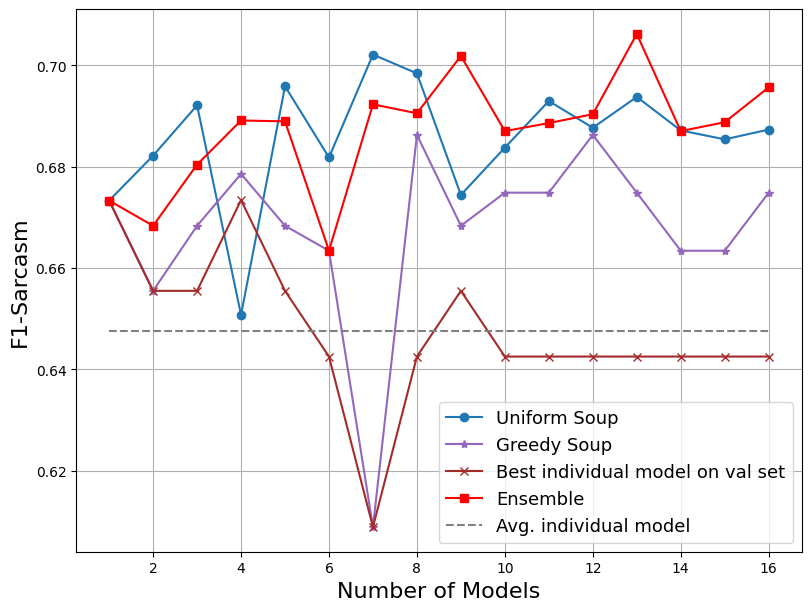

In [ ]:
fig = plt.figure(constrained_layout=True, figsize=(8, 6))
ax = fig.subplots()
ax.plot(
    uniform_soup_model_db_t['total_models'].values,
    uniform_soup_model_db_t['f1_sarcastic'].values,
    marker='o',
    color='C0',
    # s=130,
    label='Uniform Soup',
    zorder=10
)
ax.plot(
    greedy_soup_model_db_t['total_models'].values,
    greedy_soup_model_db_t['f1_sarcastic'].values,
    marker='*',
    color='C4',
    # s=130,
    label='Greedy Soup',
    zorder=10
)
ax.plot(
    best_model_db_t['total_models'].values,
    best_model_db_t['f1_sarcastic'].values,
    marker='x',
    color='Brown',
    # s=130,
    label='Best individual model on val set',
    zorder=10
)
ax.plot(
    ensemble_model_db_t['total_models'].values,
    ensemble_model_db_t['f1_sarcastic'].values,
    marker='s',
    color='Red',
    # s=130,
    label='Ensemble',
    zorder=10
)

ax.hlines(
    xmin = 1,
    xmax= 16,
    y = avg_best,
    linestyle='--',
    color='Grey',
    # s=130,
    label='Avg. individual model',
    zorder=10
)

ax.set_ylabel('F1-Sarcasm', fontsize=16)
ax.set_xlabel('Number of Models', fontsize=16)
ax.grid()
ax.legend(fontsize=13)
plt.savefig('figure_n_models_attn_t.png', bbox_inches='tight')

In [ ]:
INDIVIDUAL_MODEL_RESULTS_FILE_H = '/content/drive/MyDrive/iSarcasm/attn/m_298/results_i/results_h16.jsonl'


BEST_MODEL_RESULTS_FILE_H=  '/content/drive/MyDrive/iSarcasm/attn/m_298/results/best_model_f.jsonl'


In [ ]:
uniform_soup_db_h = pd.read_json(UNIFORM_SOUP_RESULTS_FILE_H, lines=True)
print("uniform_soup_db_h",uniform_soup_db_h)


uniform_soup_db_h         model_name  f1_sarcastic  f1_score  total_models  \
0   uniform_soup_h      0.725869  0.826820             1   
1   uniform_soup_h      0.722222  0.825758             2   
2   uniform_soup_h      0.732283  0.831729             3   
3   uniform_soup_h      0.669492  0.795978             4   
4   uniform_soup_h      0.736434  0.833664             5   
5   uniform_soup_h      0.732283  0.831729             6   
6   uniform_soup_h      0.712551  0.820597             7   
7   uniform_soup_h      0.709163  0.817750             8   
8   uniform_soup_h      0.702479  0.815240             9   
9   uniform_soup_h      0.694215  0.810107            10   
10  uniform_soup_h      0.699588  0.813258            11   
11  uniform_soup_h      0.699588  0.813258            12   
12  uniform_soup_h      0.707317  0.817514            13   
13  uniform_soup_h      0.696721  0.811287            14   
14  uniform_soup_h      0.696721  0.811287            15   
15  uniform_soup_h    

In [ ]:
greedy_soup_db_h = pd.read_json(GREEDY_SOUP_RESULTS_FILE_H, lines=True)
print("greedy_soup_db_h",greedy_soup_db_h)

greedy_soup_db_h        model_name  f1_sarcastic  f1_score  num_models  \
0   greedy_soup_h      0.725869  0.826820           1   
1   greedy_soup_h      0.736434  0.833664           1   
2   greedy_soup_h      0.745098  0.839621           2   
3   greedy_soup_h      0.735178  0.833716           1   
4   greedy_soup_h      0.745098  0.839621           2   
5   greedy_soup_h      0.753846  0.844337           1   
6   greedy_soup_h      0.735632  0.832648           1   
7   greedy_soup_h      0.746154  0.839472           2   
8   greedy_soup_h      0.745098  0.839621           2   
9   greedy_soup_h      0.759398  0.846912           2   
10  greedy_soup_h      0.759398  0.846912           3   
11  greedy_soup_h      0.746154  0.839472           2   
12  greedy_soup_h      0.759398  0.846912           2   
13  greedy_soup_h      0.753846  0.844337           2   
14  greedy_soup_h      0.753846  0.844337           2   
15  greedy_soup_h      0.759398  0.846912           3   

             

individual_model_db_h            model_name loss_fn  batch_size       lr  f1_sarcastic  f1_score  \
0   32_FL_2e-05_2_298      FL          32  0.00002      0.716535  0.821830   
1   64_FL_1e-05_2_298      FL          64  0.00001      0.611354  0.761748   
2   16_FL_2e-05_4_298      FL          16  0.00002      0.735632  0.832648   
3   36_FL_1e-05_2_298      FL          36  0.00001      0.714286  0.820779   
4   32_FL_1e-05_2_298      FL          32  0.00001      0.720000  0.824718   
5   36_FL_2e-05_2_298      FL          36  0.00002      0.728682  0.828772   
6   64_FL_2e-05_2_298      FL          64  0.00002      0.711462  0.818825   
7   32_FL_1e-05_4_298      FL          32  0.00001      0.714859  0.821679   
8   16_FL_2e-05_2_298      FL          16  0.00002      0.728682  0.828772   
9   32_FL_2e-05_4_298      FL          32  0.00002      0.726562  0.827784   
10  36_FL_2e-05_4_298      FL          36  0.00002      0.736434  0.833664   
11  64_FL_1e-05_4_298      FL          64 

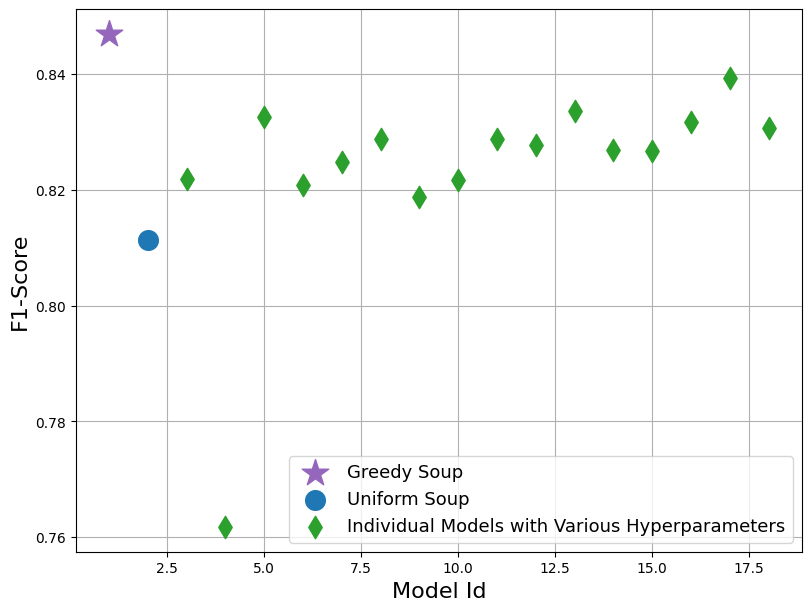

In [ ]:

# Step 5: Plot.
individual_model_db_h = pd.read_json(INDIVIDUAL_MODEL_RESULTS_FILE_H, lines=True)
print("individual_model_db_h", individual_model_db_h)

array=[]
array = [i+3 for i in range(TOTAL_MODELS)]
print(array)
fig = plt.figure(constrained_layout=True, figsize=(8, 6))
ax = fig.subplots()

ax.scatter(
    1,
    greedy_soup_db_h['f1_score'][TOTAL_MODELS-1],
    marker='*',
    color='C4',
    s=400,
    label='Greedy Soup',
    zorder=10
)

ax.scatter(
    2,
    uniform_soup_db_h['f1_score'][TOTAL_MODELS-1],
    marker='o',
    color='C0',
    s=200,
    label='Uniform Soup',
    zorder=10
)

ax.scatter(
    array,
    individual_model_db_h['f1_score'].values,
    marker='d',
    color='C2',
    s=130,
    label='Individual Models with Various Hyperparameters',
    zorder=10
)

ax.set_ylabel('F1-Score', fontsize=16)
ax.set_xlabel('Model Id', fontsize=16)
ax.grid()
ax.legend(fontsize=13)
plt.savefig('figure_att_h.png', bbox_inches='tight')

In [ ]:
ls

drive/                       results/
figure_f1_h.png              sample_data/
figure_t.png                 ssd/
greedy_base_model.pth        uniform_base_model.pth
greedy_classifier.pth        uniform_classifier.pth
greedy_soup_results_h.jsonl  uniform_soup_results_h.jsonl
greedy_soup_results_t.jsonl  uniform_soup_results_t.jsonl


In [ ]:
ls '/content/drive/MyDrive/iSarcasm/m_5751_298'

 results/  'Untitled folder'/


In [ ]:
!mkdir /content/drive/MyDrive/iSarcasm/m_5751_298/results_all_f1

In [ ]:
%cp uniform_soup_results_h.jsonl /content/drive/MyDrive/iSarcasm/attn/m_298/results_i
%cp uniform_soup_results_t.jsonl /content/drive/MyDrive/iSarcasm/attn/m_298/results_i

In [ ]:
%cp greedy_soup_results_t.jsonl /content/drive/MyDrive/iSarcasm/attn/m_298/results_i
%cp greedy_soup_results_h.jsonl /content/drive/MyDrive/iSarcasm/attn/m_298/results_i

In [ ]:

# %cp individual_model_results_h.jsonl /content/drive/MyDrive/iSarcasm/m_5751_298/results_all_f1

# %cp individual_model_results_t.jsonl /content/drive/MyDrive/iSarcasm/m_5751_298/results_all_f1


%cp best_model_f.jsonl /content/drive/MyDrive/iSarcasm/m_5751_298/results_all_f1


%cp figure_h.png /content/drive/MyDrive/iSarcasm/m_5751_298/results_all_f1
%cp figure_t.png /content/drive/MyDrive/iSarcasm/m_5751_298/results_all_f1


%cp greedy_base_model.pth /content/drive/MyDrive/iSarcasm/m_5751_298/results_all_f1
%cp greedy_classifier.pth /content/drive/MyDrive/iSarcasm/m_5751_298/results_all_f1
%cp uniform_base_model.pth /content/drive/MyDrive/iSarcasm/m_5751_298/results_all_f1
%cp uniform_classifier.pth /content/drive/MyDrive/iSarcasm/m_5751_298/results_all_f1

cp: cannot stat 'best_model_f.jsonl': No such file or directory


In [ ]:
%cp ensemble_model_results_t.jsonl /content/drive/MyDrive/iSarcasm/attn/m_298/results_i

In [ ]:
%cp figure_t.png /content/drive/MyDrive/iSarcasm/attn/m_298/results_i

In [ ]:
%cp figure_n_models_t.png /content/drive/MyDrive/iSarcasm/attn/m_298/results_i

In [ ]:
%cp figure_n_models_attn_t.png /content/drive/MyDrive/iSarcasm/attn/m_298/results_i

In [ ]:
%cp figure_att_h.png /content/drive/MyDrive/iSarcasm/attn/m_298/results_i

In [ ]:
ex_loader = loadExamplesData(batchsize=args['batch_size'], num_worker=0, pretraine_path=args['pretrained_path'],  max_length=args['max_length'])


In [ ]:
ex_accuracies,ex_outputs, ex_labels = eval_full(args, ex_loader,  uniform_soup_base_model, uniform_soup_classifier )


10/10: [>...............................] - ETA 0.0s


In [ ]:
ex_accuracies,ex_outputs, ex_labels

({'accuracy': 1.0,
  'f1_sarcastic': 1.0,
  'f1_score': 1.0,
  'report_sarcasm': '              precision    recall  f1-score   support\n\n         0.0     1.0000    1.0000    1.0000         5\n         1.0     1.0000    1.0000    1.0000         5\n\n    accuracy                         1.0000        10\n   macro avg     1.0000    1.0000    1.0000        10\nweighted avg     1.0000    1.0000    1.0000        10\n'},
 array([0., 1., 0., 1., 0., 1., 0., 1., 0., 1.]),
 array([0., 1., 0., 1., 0., 1., 0., 1., 0., 1.]))

In [ ]:
ex_accuracies,ex_outputs, ex_labels = eval_full(args, ex_loader,  greedy_soup_base_model, greedy_soup_classifier )

10/10: [>...............................] - ETA 0.0s


In [ ]:
ex_accuracies,ex_outputs, ex_labels

({'accuracy': 1.0,
  'f1_sarcastic': 1.0,
  'f1_score': 1.0,
  'report_sarcasm': '              precision    recall  f1-score   support\n\n         0.0     1.0000    1.0000    1.0000         5\n         1.0     1.0000    1.0000    1.0000         5\n\n    accuracy                         1.0000        10\n   macro avg     1.0000    1.0000    1.0000        10\nweighted avg     1.0000    1.0000    1.0000        10\n'},
 array([0., 1., 0., 1., 0., 1., 0., 1., 0., 1.]),
 array([0., 1., 0., 1., 0., 1., 0., 1., 0., 1.]))

In [ ]:
ls '/content/drive/MyDrive/iSarcasm/attn/m_298/results_all_f1/greedy_base_model.pth '

figure_h.png                 greedy_soup_results_t.jsonl
figure_t.png                 uniform_base_model.pth
greedy_base_model.pth        uniform_classifier.pth
greedy_classifier.pth        uniform_soup_results_h.jsonl
greedy_soup_results_h.jsonl  uniform_soup_results_t.jsonl


In [ ]:
base_model = TransformerLayer(pretrained_path=args['pretrained_path'], both=True).to(device)

base_model.load_state_dict(torch.load('/content/drive/MyDrive/iSarcasm/attn/m_298/results_all_f1/greedy_base_model.pth'))
# ls ./ssd/checkpoints/soups
state_dict_cls = torch.load('/content/drive/MyDrive/iSarcasm/attn/m_298/results_all_f1/greedy_classifier.pth')

classifier = get_model_from_sd(state_dict_cls, base_model)

base_model = base_model.to(device)
classifier = classifier.to(device)

val_accuracies,val_outputs, val_labels = eval_full(args, ex_loader,  base_model, classifier )

val_accuracies,val_outputs, val_labels

In [ ]:
base_model = TransformerLayer(pretrained_path=args['pretrained_path'], both=True).to(device)

base_model.load_state_dict(torch.load('/content/drive/MyDrive/iSarcasm/attn/m_298/results_all_f1/uniform_base_model.pth'))
# ls ./ssd/checkpoints/soups
state_dict_cls = torch.load('/content/drive/MyDrive/iSarcasm/attn/m_298/results_all_f1/uniform_classifier.pth')

classifier = get_model_from_sd(state_dict_cls, base_model)

base_model = base_model.to(device)
classifier = classifier.to(device)

val_accuracies,val_outputs, val_labels = eval_full(args, ex_loader,  base_model, classifier )

val_accuracies,val_outputs, val_labels

10/10: [>...............................] - ETA 0.0s


({'accuracy': 1.0,
  'f1_sarcastic': 1.0,
  'f1_score': 1.0,
  'report_sarcasm': '              precision    recall  f1-score   support\n\n         0.0     1.0000    1.0000    1.0000         5\n         1.0     1.0000    1.0000    1.0000         5\n\n    accuracy                         1.0000        10\n   macro avg     1.0000    1.0000    1.0000        10\nweighted avg     1.0000    1.0000    1.0000        10\n'},
 array([0., 1., 0., 1., 0., 1., 0., 1., 0., 1.]),
 array([0., 1., 0., 1., 0., 1., 0., 1., 0., 1.]))

# GRU

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


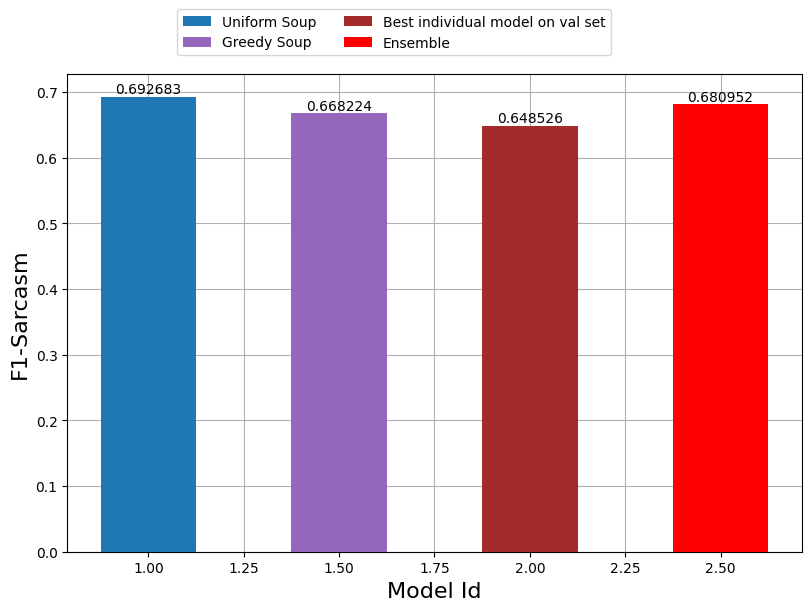

In [ ]:

UNIFORM_SOUP_RESULTS_FILE_T = '/content/drive/MyDrive/iSarcasm/gru/m_298/results_i/uniform_soup_results_t.jsonl'
GREEDY_SOUP_RESULTS_FILE_T = '/content/drive/MyDrive/iSarcasm/gru/m_298/results_i/greedy_soup_results_t.jsonl'
BEST_MODEL_RESULTS_FILE_T =  '/content/drive/MyDrive/iSarcasm/gru/m_298/results_i/best_model_f_all.jsonl'

ENSEMBLE_MODEL_RESULTS_FILE_T =  '/content/drive/MyDrive/iSarcasm/gru/m_298/results_i/ensemble_model_results_t.jsonl'

uniform_soup_model_db_t = pd.read_json(UNIFORM_SOUP_RESULTS_FILE_T, lines=True)

greedy_soup_model_db_t = pd.read_json(GREEDY_SOUP_RESULTS_FILE_T, lines=True)

best_model_db_t = pd.read_json(BEST_MODEL_RESULTS_FILE_T, lines=True)

ensemble_model_db_t = pd.read_json(ENSEMBLE_MODEL_RESULTS_FILE_T, lines=True)

TOTAL_MODELS = 16

# Step 5: Plot.


array=[]
array = [i+3 for i in range(TOTAL_MODELS)]
print(array)
fig = plt.figure(constrained_layout=True, figsize=(8, 6))
ax = fig.subplots()

ax.bar(
    1,
    uniform_soup_model_db_t['f1_sarcastic'][TOTAL_MODELS - 1],
    # marker='o',
    color='C0',
    # s=130,
    width=0.25,
    label='Uniform Soup',
    zorder=10
)
ax.bar(
    1.5,
    greedy_soup_model_db_t['f1_sarcastic'][TOTAL_MODELS - 1],
    # marker='*',
    color='C4',
    # s=130,
    width=0.25,
    label='Greedy Soup',
    zorder=10
)
ax.bar(
    2,
    best_model_db_t['f1_sarcastic'][TOTAL_MODELS - 1],
    # marker='x',
    color='brown',
    # s=130,
    width=0.25,
    label='Best individual model on val set',
    zorder=10
)
ax.bar(
    2.5,
    ensemble_model_db_t['f1_sarcastic'][TOTAL_MODELS - 1],
    # marker='s',
    color='Red',
    width=0.25,
    # s=130,
    label='Ensemble',
    zorder=10
)

for bars in ax.containers:
    ax.bar_label(bars)
ax.set_ylabel('F1-Sarcasm', fontsize=16)
ax.set_xlabel('Model Id', fontsize=16)
ax.grid()
ax.legend(fontsize=13)
# Defines best position of the legend in the figure
# ax.legend(loc='lower right', fancybox=True)
ax.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
plt.savefig('figure_gru_t.png', bbox_inches='tight')
%cp figure_gru_t.png '/content/drive/MyDrive/iSarcasm/gru/m_298/results_i'

# attn

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


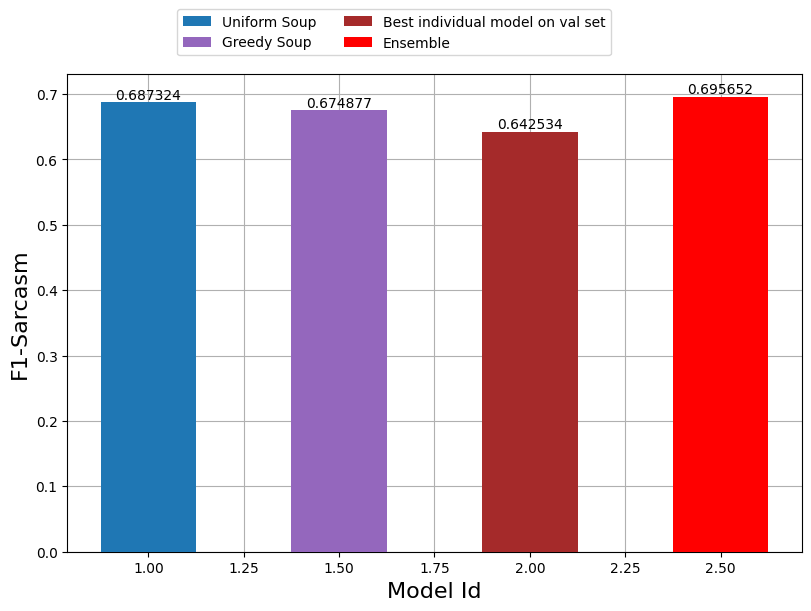

In [ ]:

UNIFORM_SOUP_RESULTS_FILE_T = '/content/drive/MyDrive/iSarcasm/attn/m_298/results_i/uniform_soup_results_t.jsonl'
GREEDY_SOUP_RESULTS_FILE_T = '/content/drive/MyDrive/iSarcasm/attn/m_298/results_i/greedy_soup_results_t.jsonl'
BEST_MODEL_RESULTS_FILE_T =  '/content/drive/MyDrive/iSarcasm/attn/m_298/results_i/best_model_f_all.jsonl'

ENSEMBLE_MODEL_RESULTS_FILE_T =  '/content/drive/MyDrive/iSarcasm/attn/m_298/results_i/ensemble_model_results_t.jsonl'

uniform_soup_model_db_t = pd.read_json(UNIFORM_SOUP_RESULTS_FILE_T, lines=True)

greedy_soup_model_db_t = pd.read_json(GREEDY_SOUP_RESULTS_FILE_T, lines=True)

best_model_db_t = pd.read_json(BEST_MODEL_RESULTS_FILE_T, lines=True)

ensemble_model_db_t = pd.read_json(ENSEMBLE_MODEL_RESULTS_FILE_T, lines=True)

TOTAL_MODELS = 16

# Step 5: Plot.


array=[]
array = [i+3 for i in range(TOTAL_MODELS)]
print(array)
fig = plt.figure(constrained_layout=True, figsize=(8, 6))
ax = fig.subplots()

ax.bar(
    1,
    uniform_soup_model_db_t['f1_sarcastic'][TOTAL_MODELS - 1],
    # marker='o',
    color='C0',
    # s=130,
    width=0.25,
    label='Uniform Soup',
    zorder=10
)
ax.bar(
    1.5,
    greedy_soup_model_db_t['f1_sarcastic'][TOTAL_MODELS - 1],
    # marker='*',
    color='C4',
    # s=130,
    width=0.25,
    label='Greedy Soup',
    zorder=10
)
ax.bar(
    2,
    best_model_db_t['f1_sarcastic'][TOTAL_MODELS - 1],
    # marker='x',
    color='brown',
    # s=130,
    width=0.25,
    label='Best individual model on val set',
    zorder=10
)
ax.bar(
    2.5,
    ensemble_model_db_t['f1_sarcastic'][TOTAL_MODELS - 1],
    # marker='s',
    color='Red',
    width=0.25,
    # s=130,
    label='Ensemble',
    zorder=10
)
for bars in ax.containers:
    ax.bar_label(bars)

ax.set_ylabel('F1-Sarcasm', fontsize=16)
ax.set_xlabel('Model Id', fontsize=16)
ax.grid()
ax.legend(fontsize=13)
# Defines best position of the legend in the figure
# ax.legend(loc='lower right', fancybox=True)
ax.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
plt.savefig('figure_attn_t.png', bbox_inches='tight')


In [ ]:
 %cp figure_attn_t.png '/content/drive/MyDrive/iSarcasm/attn/m_298/results_i'